# **Bank Marketing Analysis**

**Detailed Column Descriptions**

1. ***Bank customer information:***

- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")

2. ***Related with the last contact of the current campaign:***
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- duration: last contact duration, in seconds (numeric)

3. ***Other attributes:***
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

4. Output variable (desired target):
- deposit - has the client subscribed a term deposit? (binary: "yes","no")


**Features Overview:**

1. **Numerical Features:** ‘age’, ‘balance’, ‘day’, ‘duration’, ‘campaign’, ‘pdays’, ‘previous’.
2. **Categorical Features:** ‘job’, ‘marital’, ‘education’, ‘default’, ‘housing’, ‘loan’, ‘contact’, ‘month’, ‘poutcome’, ‘deposit’.

## **Business Problem:**

The bank has recently conducted a marketing campaign to promote its new savings account product. However, the campaign did not yield the expected results in terms of customer acquisition and account openings. The bank wants to understand why the campaign did not perform as expected and identify opportunities for improvement in future marketing efforts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = bank.copy()

In [5]:
#Define the data shape rows and columns
df.shape

(45211, 17)

In [6]:
#Describe a basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#List the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
#Show unique data
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

## **Data Cleansing**

* Check NULL and Duplicated rows

In [9]:
df.isnull().sum() #Null

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df.duplicated().sum() #Duplicated Rows

0

* Set new ordering columns

In [11]:
# Selecting columns of interest from the 'bank' DataFrame
selected_columns = ['deposit', 'age', 'job', 'marital', 'education', 'default', 'balance',
                    'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
                    'pdays', 'previous', 'poutcome']

# Creating a new DataFrame 'df' with selected columns
df = bank[selected_columns]
df.head()


,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


* Set month number

In [12]:
#Display Month
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [13]:
month_mapping = {'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb' : 2,'mar': 3, 'apr': 4, 'sep': 9}
df['month'] = df['month'].map(month_mapping)
df

,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown
45207,yes,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown
45208,yes,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success
45209,no,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown


* Handling Ordinal Categorical Variables

In [14]:
#Show the non-numerical columns
non_numerical_cols = df.select_dtypes(exclude='number').columns.tolist()
non_numerical_cols

['deposit',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [15]:
# Preprocessing (Non-numerical columns to Numerical columns)
# Using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
new_df = df.copy()

#Label Encoding
for cols in non_numerical_cols: #Use For-loop
    new_df[cols] = encoding.fit_transform(df[cols])

In [16]:
new_df

,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3
1,0,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3
2,0,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3
3,0,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3
4,0,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3
45207,1,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3
45208,1,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2
45209,0,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3


**Summary:**
1. The bank marketing dataset has 45,211 rows and 17 columns.
2. There's no *missing value* in any columns.
3. There's no *duplicated rows*.
4. Set the new ordering columns by set 'deposit' as the first row.
5. Convert 'month' columns into number each month.
6. In preprocessing, handle the categorial data into numerical with LabelEncoding.

### **Exploratory Data Analysis (EDA)**

### a. **Statistical Overview**

In [17]:
#Describe the data
df.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
#Describe the data
df.describe(include='O')

,deposit,job,marital,education,default,housing,loan,contact,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,2,12,3,4,2,2,2,3,4
top,no,blue-collar,married,secondary,no,yes,no,cellular,unknown
freq,39922,9732,27214,23202,44396,25130,37967,29285,36959


In [19]:
#All the statistical overview of the customer from bank marketing
deposit_summary = new_df.describe()
deposit_summary

,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.116985,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,2.559974
std,0.321406,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.989059
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,3.000000
50%,0.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,0.000000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,1.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000


In [20]:
new_df.groupby('deposit').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
deposit,,,,,,,,,,,,,,,,
0,40.838986,4.291594,1.157632,1.206778,0.019112,1303.714969,0.581008,0.169330,0.688743,15.892290,6.128250,221.182806,2.846350,36.421372,0.502154,2.587997
1,41.670070,4.703347,1.243902,1.360938,0.009832,1804.267915,0.365854,0.091511,0.274154,15.158253,6.268482,537.294574,2.141047,68.702968,1.170354,2.348459


**Result:**
1. The survey of customer banking had 45,211 and 17 features.
2. The conversion rate(the ratio of opened time deposit account) is 0.11.
3. The average age of the individuals in the dataset is approximately 41 years.
4. The most common day appears to be around the middle of the month, as indicated by the 50th percentile (median).
5. The 75% of customer have not been contacted previously, as indicated by the presence of -1 in the 25th, 50th, and 75th percentiles.
6. The average number of interactions in previous campaigns is approximately 0.58.
7. The average duration of calls is approximately 258 seconds (about 4 minutes and 18 seconds).
8. The shortest call duration is 0 seconds, which could conclude missed calls or very brief interactions.

 ### b.  **The Correlation Matrix(Heatmap)**

<Axes: >

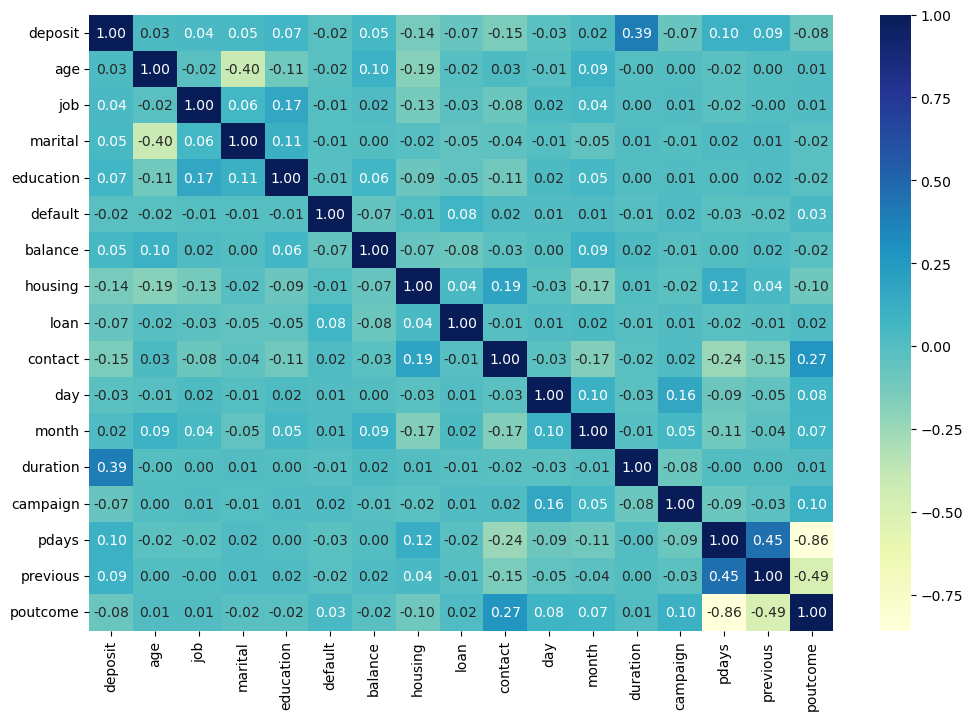

In [21]:
#Plotting correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(), fmt=".2f", cmap="YlGnBu", annot=True)

**Result:**
1. The top most highly **positive** correlated with time deposit opened account(deposit)
    - deposit vs. duration (0.39)
    - deposit vs. pdays (0.1)

2. The top most highly **negative** correlated with time deposit opened account(deposit)
    - deposit vs. contact (-0.15)
    - deposit vs. housing (-0.14)

3. The most highly **positive** correlated with feature
    - pdays vs. previous (0.45)
    - contact vs. poutcome (0.27)

4. The most highly **negative** correlated with feature
    - pdays vs. poutcome (-0.86)
    - poutcome vs. previous (-0.49)
    - marital vs. age (-0.40)

### c. **Distribution Plot**

* **Numerical Data Plot**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

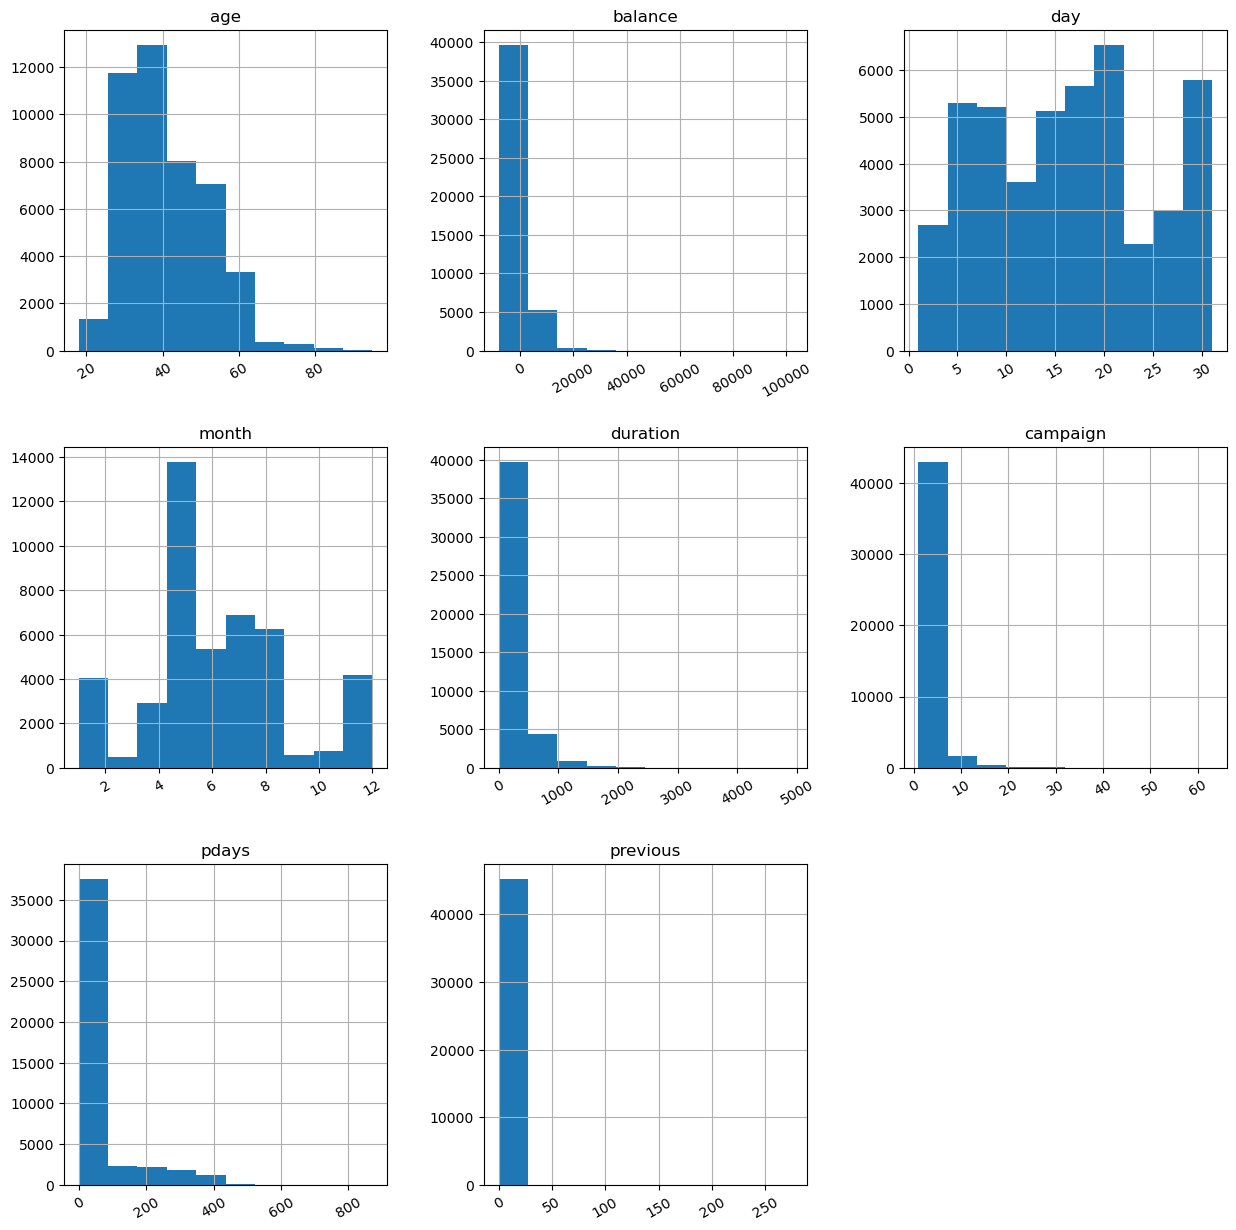

In [22]:
#Plotting Histogram
df.hist(figsize=(15, 15), xrot=30)

* **Categorial Data Plot**

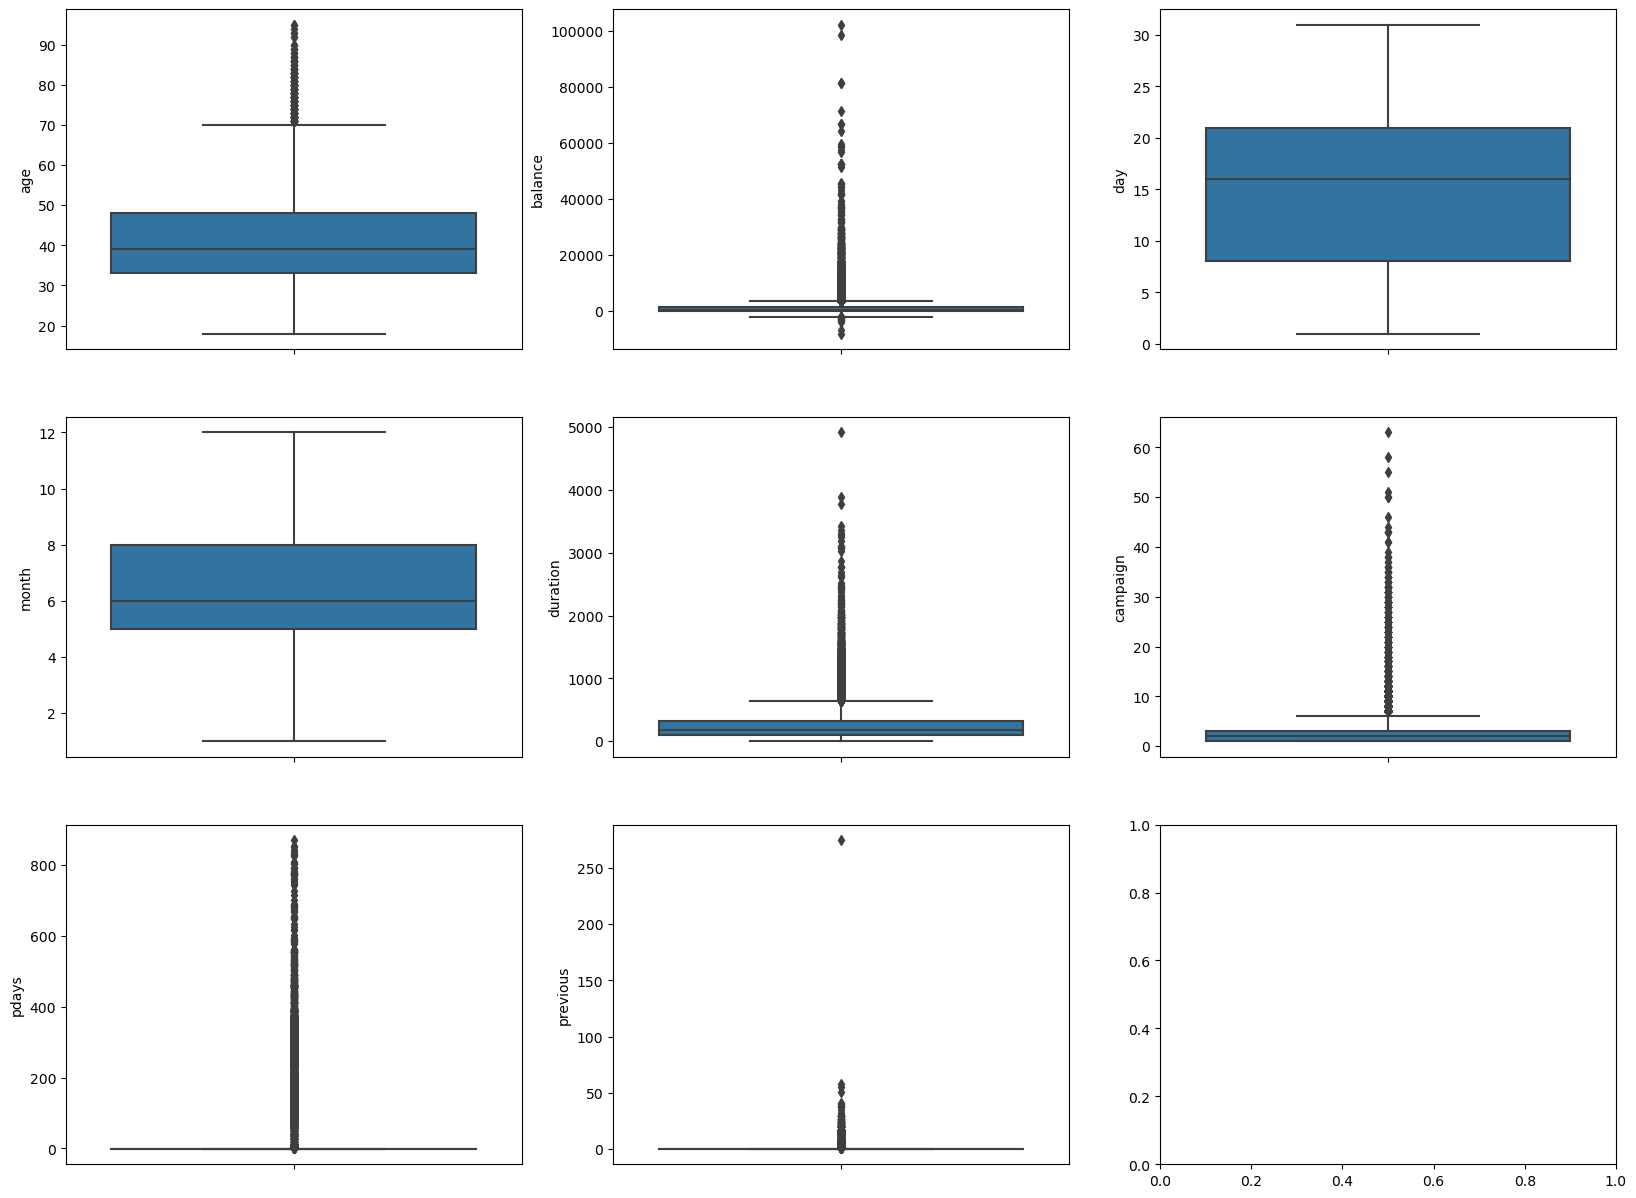

In [77]:
#Set the number columns
number_columns = df.select_dtypes(include=np.number).columns.tolist()

#Print the Categorial data
fig, ax = plt.subplots(3,3, figsize = (20,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(y = i , data = df, ax = subplot)

### c. **Feature Analysis** 

- **Deposit Campaign Opening Account (deposit vs. age)**

In [25]:
# Calculate the count and percentage of each category in the 'deposit' column
deposit_counts = df['deposit'].value_counts()
deposit_percentages = df['deposit'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
deposit_summary = pd.DataFrame({'Count': deposit_counts, 'Percentage(%)': deposit_percentages})
deposit_summary


,Count,Percentage(%)
deposit,,
no,39922,88.30152
yes,5289,11.69848


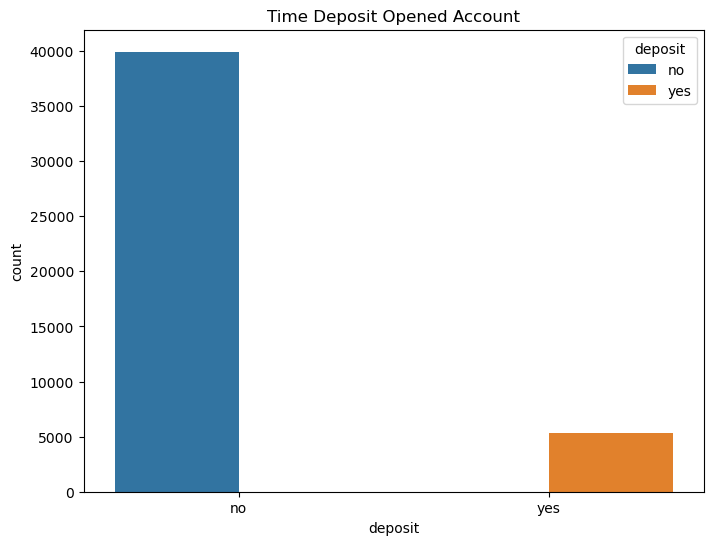

In [26]:
plt.figure(figsize=(8, 6))
plt.title('Time Deposit Opened Account')
plt.xlabel('Deposit Category')
plt.ylabel('Count')
ax = sns.countplot(data=df, x='deposit', hue='deposit')
plt.show()

**Result:**
1. For the last campaign, customer who open deposit account is around 5,289 accounts from 45,211.
2. The conversion rate was 0.116 (11.6% of total customer in campaign).

* **Age Distribution (deposit vs. age)**

In [27]:
def age_cal(age):
    if age < 30:
        age_range = '18 - 29 Years'
    elif age < 42:
        age_range = '30 - 41 Years'
    elif age < 54:
        age_range = '42 - 53 Years'
    elif age < 65:
        age_range = '54 - 65 Years'
    elif age < 78:
        age_range = '66 - 77 Years'
    elif age < 89:
        age_range = '78 - 89 Years'
    else:
        age_range = '90 years above'
    return age_range

#Set function
df['age_range'] = df['age'].apply(lambda x: age_cal(x))

# Calculate the count and percentage of each category in the 'deposit' column
age_counts = df['age_range'].value_counts()
age_percentages = df['age_range'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
age_summary = pd.DataFrame({'Count': age_counts, 'Percentage(%)': age_percentages})
age_summary

,Count,Percentage(%)
age_range,,
30 - 41 Years,20735,45.862733
42 - 53 Years,12686,28.059543
54 - 65 Years,5707,12.623034
18 - 29 Years,5273,11.663091
66 - 77 Years,625,1.382407
78 - 89 Years,173,0.382650
90 years above,12,0.026542


In [28]:
age_range = df.pivot_table(values='job', index='age_range', columns='deposit', aggfunc='count')
age_range

deposit,no,yes
age_range,,
18 - 29 Years,4345,928
30 - 41 Years,18586,2149
42 - 53 Years,11540,1146
54 - 65 Years,4982,725
66 - 77 Years,363,262
78 - 89 Years,101,72
90 years above,5,7


In [29]:
# Calculate the total count for each age range
total_counts = age_range.sum(axis=1)
# Divide each count in age_range by its respective total count and multiply by 100 to get percentages
percentage_age_range = (age_range.div(total_counts, axis=0) * 100).round(2)
percentage_age_range

deposit,no,yes
age_range,,
18 - 29 Years,82.40,17.60
30 - 41 Years,89.64,10.36
42 - 53 Years,90.97,9.03
54 - 65 Years,87.30,12.70
66 - 77 Years,58.08,41.92
78 - 89 Years,58.38,41.62
90 years above,41.67,58.33


<Figure size 1000x600 with 0 Axes>

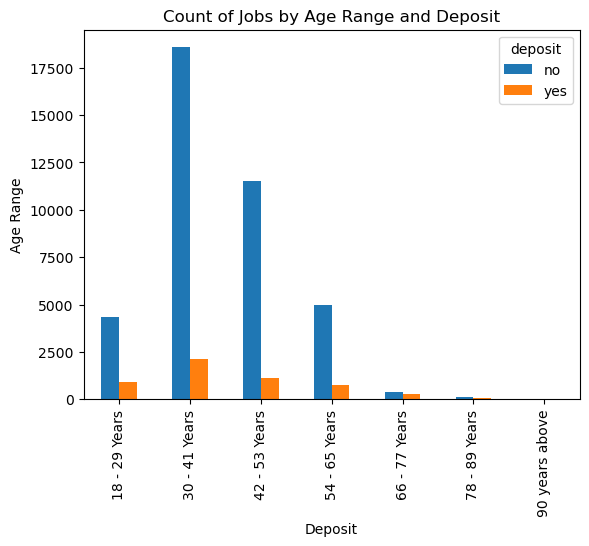

In [30]:
plt.figure(figsize=(10, 6))
ax = age_range.plot(kind='bar')
plt.title('Count of Jobs by Age Range and Deposit')
plt.xlabel('Deposit')
plt.ylabel('Age Range')
plt.show()


**Result:**
1. The age range around 40-50 years was peak distribution for open time deposit account.
2. The age range around 30-41 years was the highest chance to open time deposit account.


* **Job Destribution (deposit vs. job)**

In [31]:
# Calculate the count and percentage of each category in the 'deposit' column
job_counts = df['job'].value_counts()
job_percentages = df['job'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
job_summary = pd.DataFrame({'Count': job_counts, 'Percentage(%)': job_percentages})
job_summary

,Count,Percentage(%)
job,,
blue-collar,9732,21.525735
management,9458,20.919688
technician,7597,16.803433
admin.,5171,11.437482
services,4154,9.188029
retired,2264,5.007631
self-employed,1579,3.492513
entrepreneur,1487,3.289023
unemployed,1303,2.882042


In [32]:
df.pivot_table(values='age', index='job', columns='deposit', aggfunc='count')

deposit,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


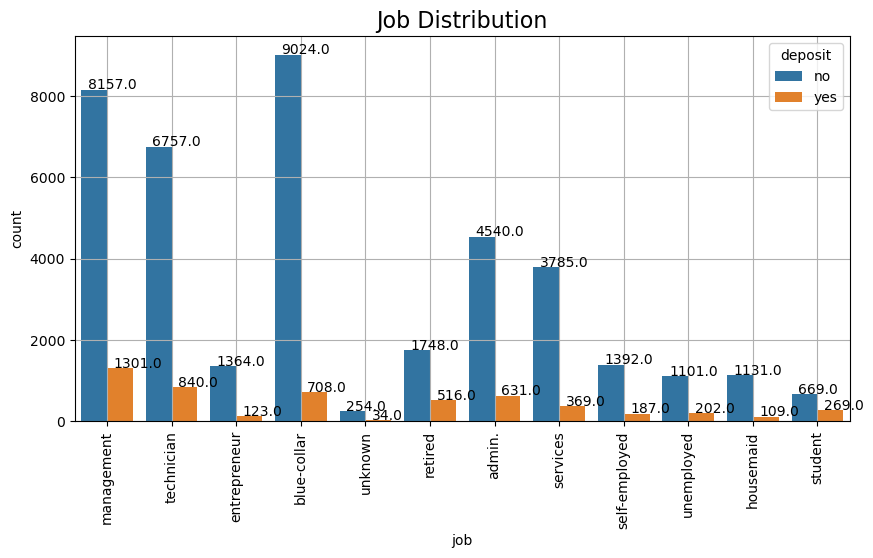

In [33]:
#Compute and get the order of Job distribution
job_count = df['job'].value_counts()

plt.figure(figsize=(10,5))
plt.title('Job Distribution', size=16)
plt.xlabel('Job', size=10)
plt.ylabel('Employee count', size=10)
ax = sns.countplot(x='job', data=df, hue='deposit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The management, technician and blue-collar were the most open the time deposit account in last campaign.


* **Education Type Distribution (deposit vs. education)**

In [34]:
# Calculate the count and percentage of each category in the 'deposit' column
education_counts = df['education'].value_counts()
education_percentages = df['education'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
education_summary = pd.DataFrame({'Count': education_counts, 'Percentage(%)': education_percentages})
education_summary

,Count,Percentage(%)
education,,
secondary,23202,51.319369
tertiary,13301,29.419831
primary,6851,15.153392
unknown,1857,4.107407


In [35]:
df.pivot_table(values='balance', index='education', columns='deposit', aggfunc='count')

deposit,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


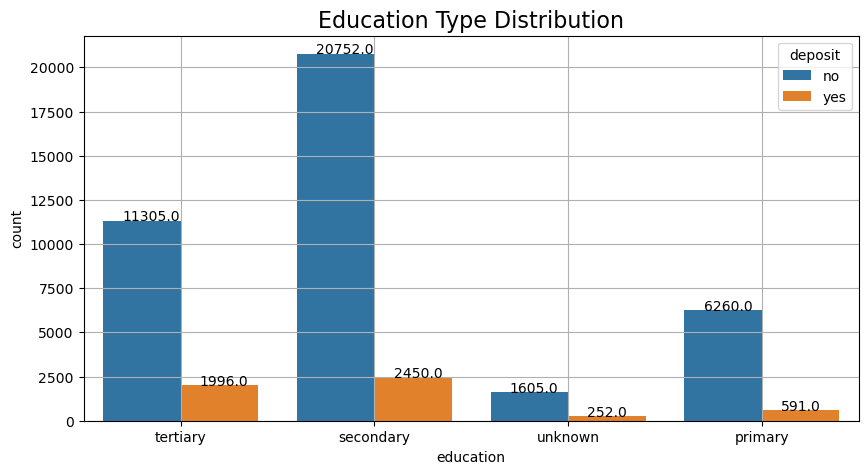

In [36]:
plt.figure(figsize=(10,5))
plt.title('Education Type Distribution', size=16)
plt.xlabel('Education', size=10)
plt.ylabel('Education count', size=10)
ax = sns.countplot(x='education', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

plt.grid(True)
plt.show()

**Result:**

For the last campaign, the secondary education(2,450) had most open time deposit account and followed by tertiary(1,996).

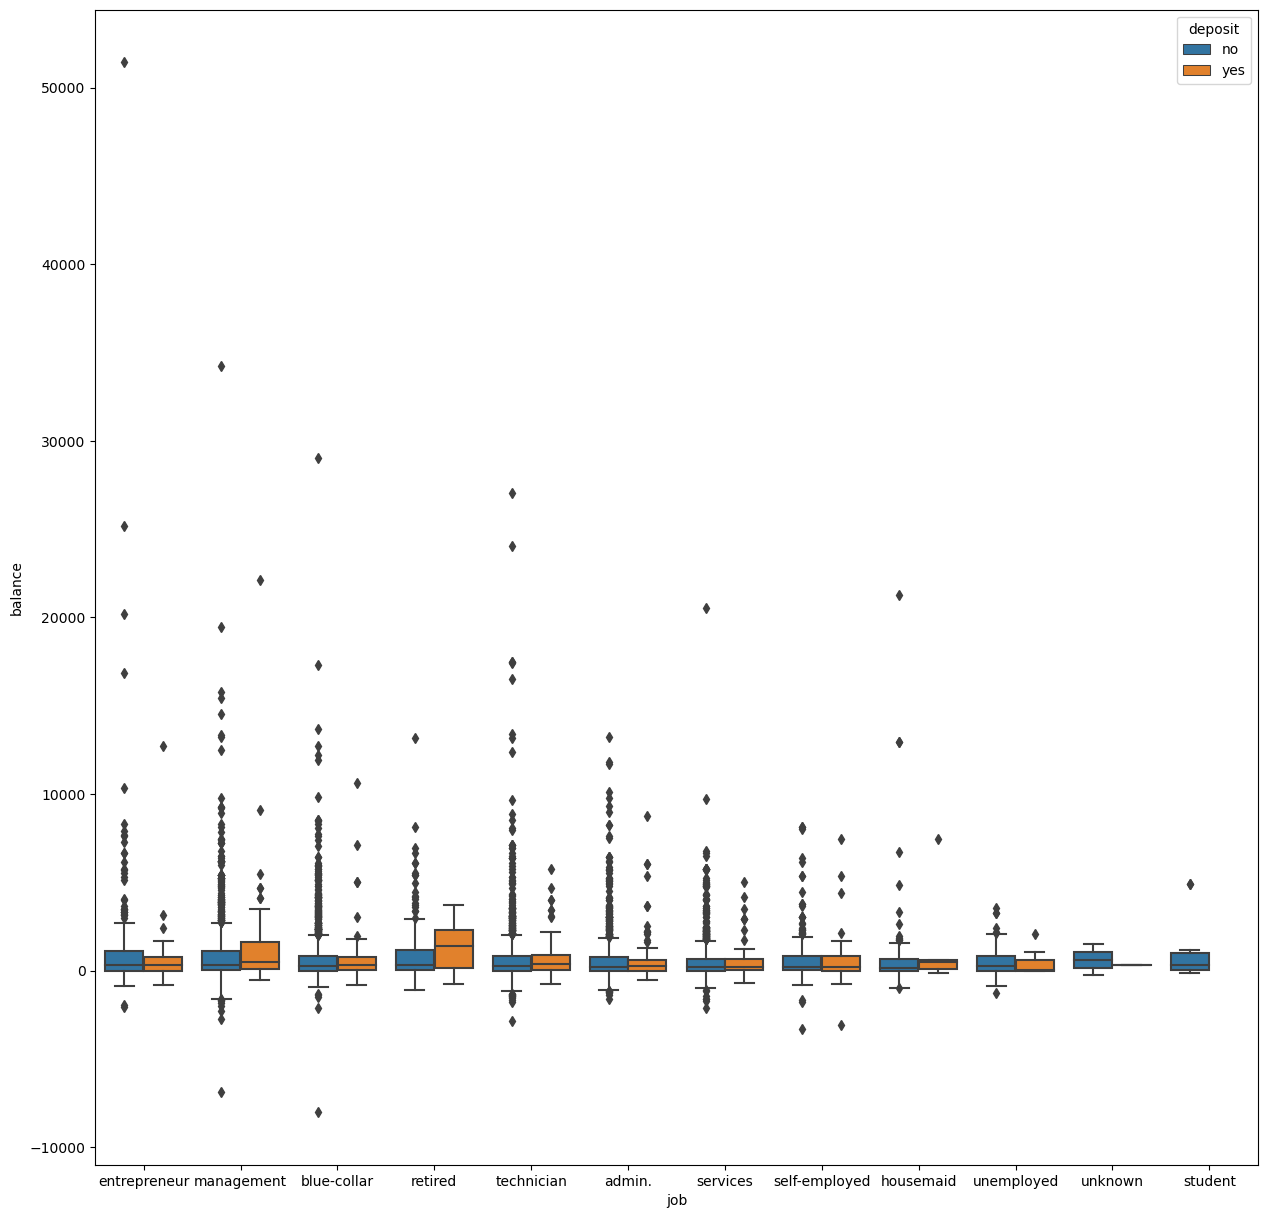

In [37]:
plt.figure(figsize=(15, 15))
ax = sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['loan']=='yes'], orient='v' )

<Axes: xlabel='job', ylabel='balance'>

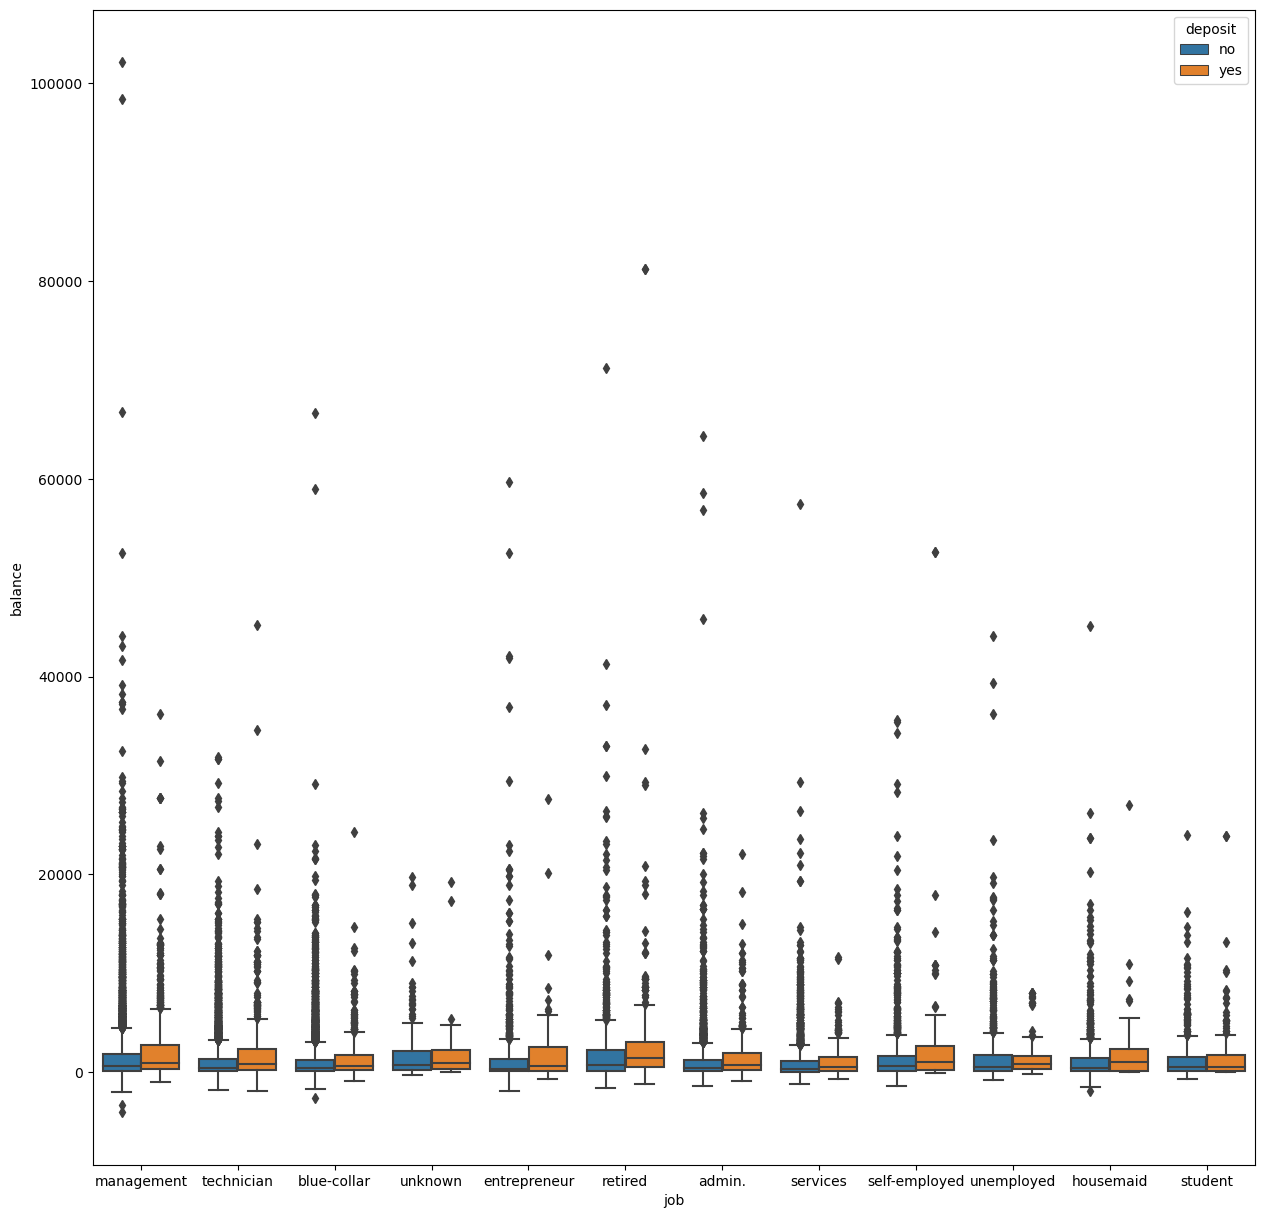

In [38]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['loan']=='no'], orient='v' )

* **Marital Status Distribution (deposit vs. marital)**

In [39]:
# Calculate the count and percentage of each category in the 'deposit' column
marital_counts = df['marital'].value_counts()
marital_percentages = df['marital'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
marital_summary = pd.DataFrame({'Count': marital_counts, 'Percentage(%)': marital_percentages})
marital_summary

,Count,Percentage(%)
marital,,
married,27214,60.193316
single,12790,28.289576
divorced,5207,11.517109


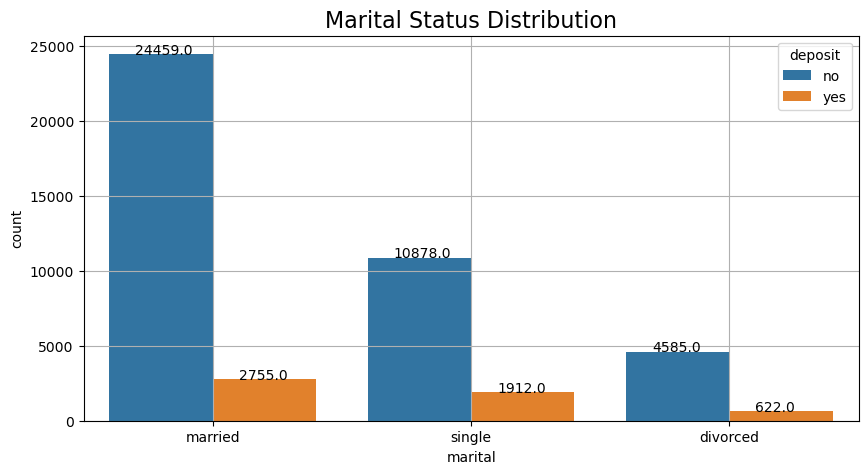

In [40]:
plt.figure(figsize=(10,5))
plt.title('Marital Status Distribution', size=16)
plt.xlabel('Marital Status', size=10)
plt.ylabel('Marital count', size=10)
ax = sns.countplot(x='marital', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

1. Married customers had the most opened time deposit account.
2. Focus on single customer may not differ significantly from married customers to open time deposit account.

* **Contact Type Distribution with Deposit (deposit vs. contact)**

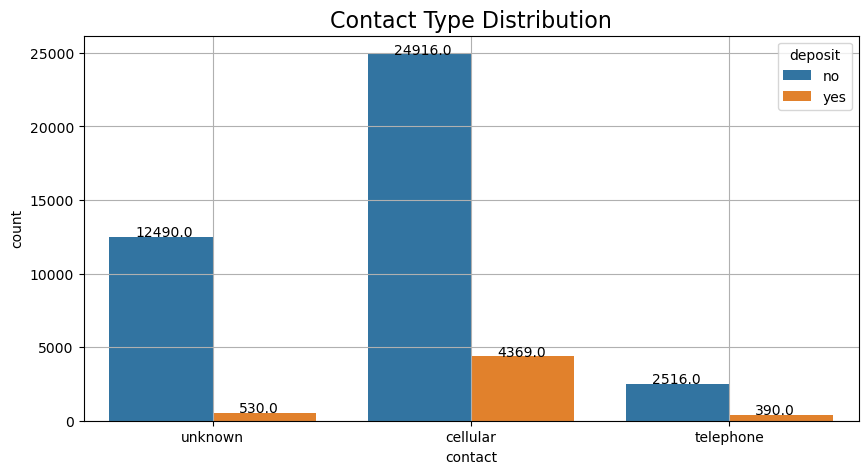

In [41]:
plt.figure(figsize=(10,5))
plt.title('Contact Type Distribution', size=16)
plt.xlabel('Contact', size=10)
plt.ylabel('Contact count', size=10)
ax = sns.countplot(x='contact', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The cellular contact type has impact to open time deposit account.

* **Housing Loan Status Distribution (deposit vs. housing)** 

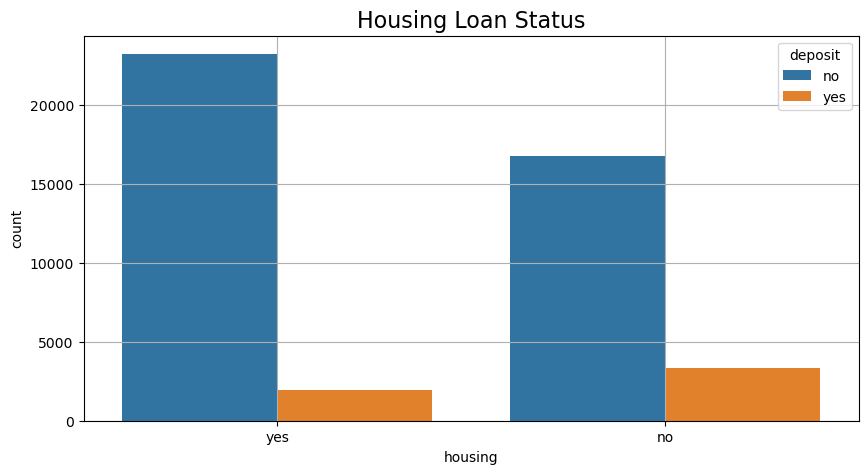

In [42]:
plt.figure(figsize=(10,5))
plt.title('Housing Loan Status', size=16)
plt.xlabel('Status', size=10)
plt.ylabel('Customer count', size=10)
ax = sns.countplot(x='housing', data=df, hue='deposit')
plt.grid(True)
plt.show()

**Result:**

The customer who didn't have an housing loan had a high chance to open time deposit account.

* **Loan Status with Time Deposit Decision**

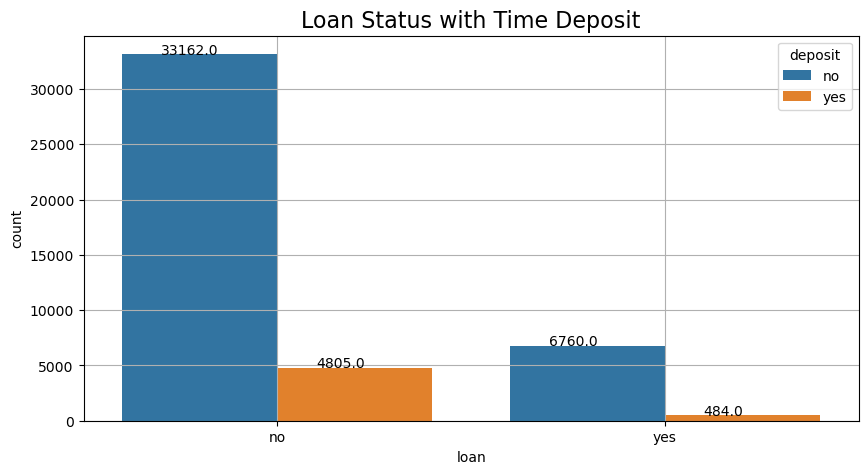

In [43]:
plt.figure(figsize=(10,5))
plt.title('Loan Status with Time Deposit', size=16)
plt.xlabel('Status', size=10)
plt.ylabel('Customer count', size=10)
ax = sns.countplot(x='loan', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The customer who didn't have an personal loan had a high chance to open time deposit account.

* **Last Contact Month Distribution with Deposit (deposit vs. month)**

In [44]:
df.pivot_table(values='age', index='month', columns='deposit', aggfunc='count')

deposit,no,yes
month,,
1,1261,142
2,2208,441
3,229,248
4,2355,577
5,12841,925
6,4795,546
7,6268,627
8,5559,688
9,310,269


In [45]:
pivot_table = df.pivot_table(values='age', index='month', columns='deposit', aggfunc='count')

# Calculate the total count for each month
total_count_per_month = pivot_table.sum(axis=1)
(pivot_table.div(total_count_per_month, axis=0) * 100).round(2)

deposit,no,yes
month,,
1,89.88,10.12
2,83.35,16.65
3,48.01,51.99
4,80.32,19.68
5,93.28,6.72
6,89.78,10.22
7,90.91,9.09
8,88.99,11.01
9,53.54,46.46


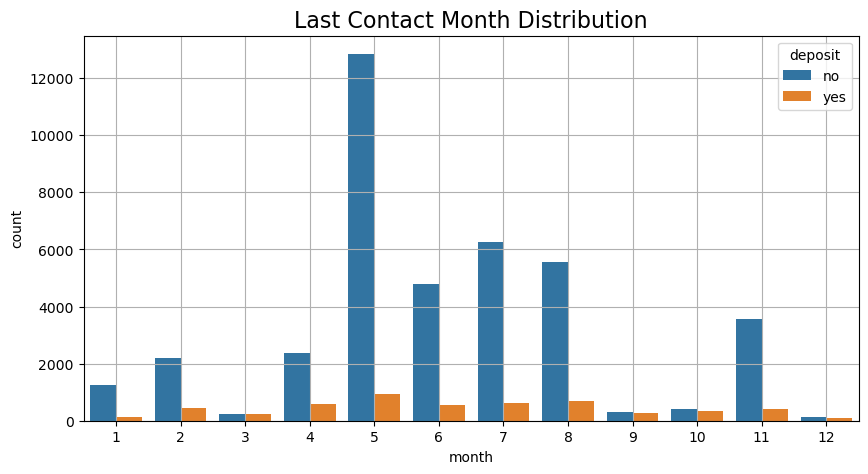

In [46]:
plt.figure(figsize=(10,5))
plt.title('Last Contact Month Distribution', size=16)
plt.xlabel('Education', size=10)
plt.ylabel('Education count', size=10)
ax = sns.countplot(x='month', data=df, hue='deposit')
plt.grid(True)
plt.show()

**Result:**

On May to August had a highest peak of customer who opened time deposit account.

* **The amount of contact campaign in deposit decision**

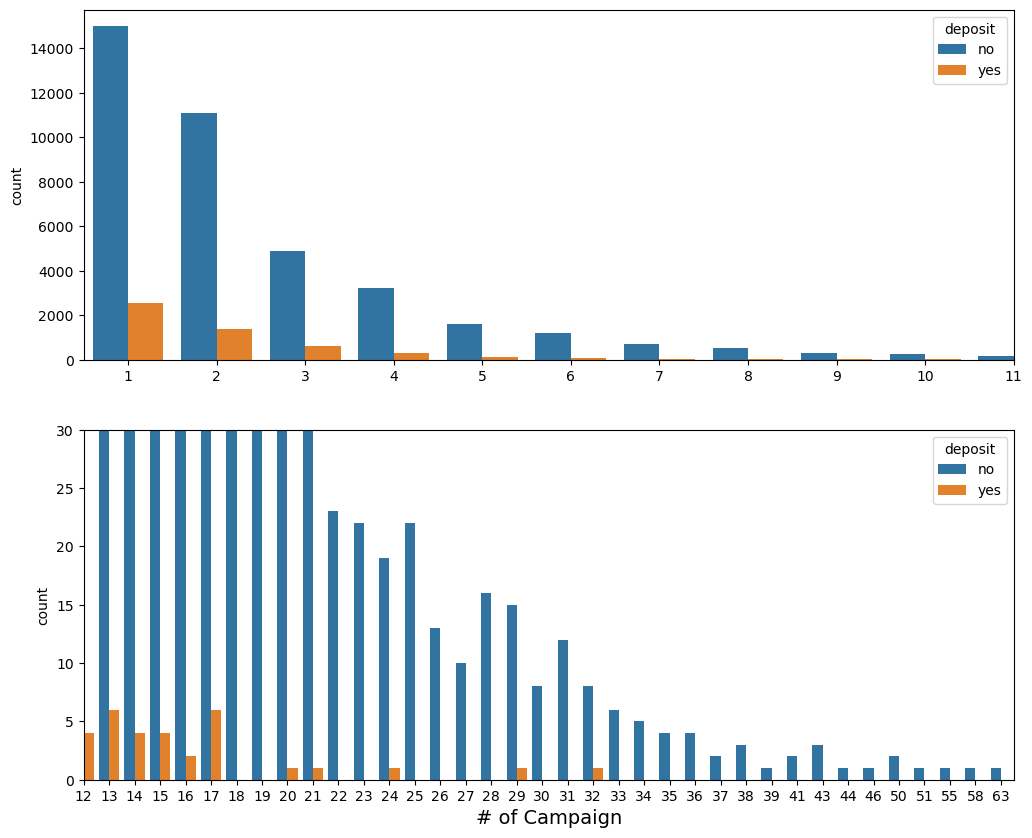

In [47]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(right=10)
plt.xlabel('')
plt.subplot(2, 1, 2)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(left=11)
plt.ylim(top=30)
plt.xlabel('# of Campaign', fontsize=14)
plt.show()

**Result:**

The chart show that when customer had more campaign contact, the chance for open time deposit account was decreased.

* **The previous outcome in last campaign**

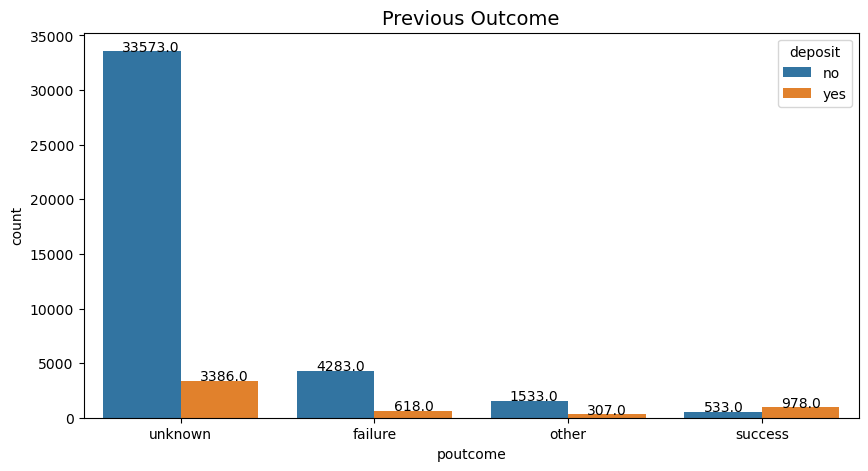

In [48]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="poutcome", hue="deposit", data=df)
plt.title("Previous Outcome", fontsize=14)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

* **The credit in default distribution**

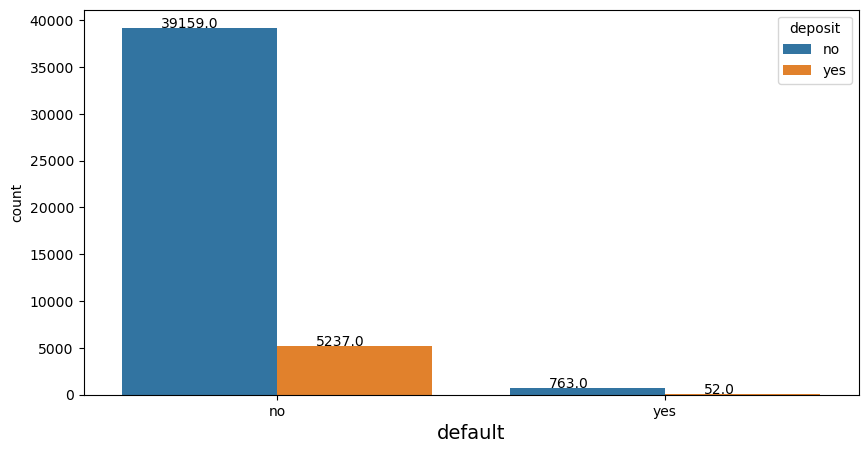

In [49]:
plt.figure(figsize=(10, 5))
plt.xlabel("Has Default on Credit?", fontsize=14)
ax = sns.countplot(x="default", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

plt.show()

* **The balance distribution**

In [50]:
print('The average balance is',df['balance'].mean())
print('The median balance is',df['balance'].median())

The average balance is 1362.2720576850766
The median balance is 448.0


In [51]:
deposit_yes = df[df['deposit'] == 'yes']
print('Balance of customer have time deposit account')
print('The average balance is',deposit_yes['balance'].mean())
print('The median balance is',deposit_yes['balance'].median())# Assuming df is your DataFrame containing the 'balance' and 'deposit' columns

Q1 = deposit_yes['balance'].quantile(0.25)
Q3 = deposit_yes['balance'].quantile(0.75)

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)

Balance of customer have time deposit account
The average balance is 1804.2679145396105
The median balance is 733.0
First Quartile (Q1): 210.0
Third Quartile (Q3): 2159.0


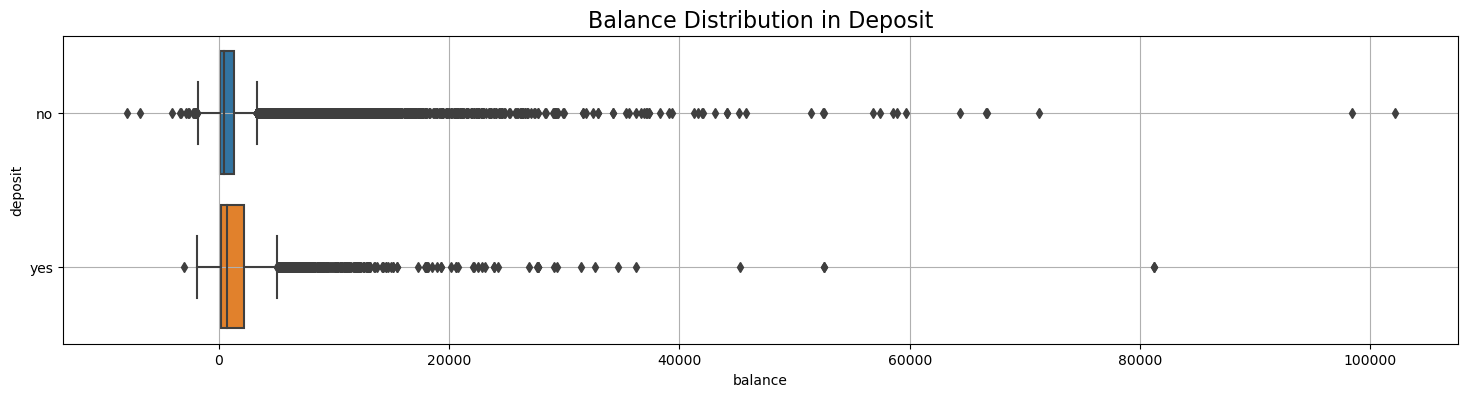

In [52]:
plt.figure(figsize=(18,4))
plt.title('Balance Distribution in Deposit',size=16)
plt.xlabel('Balance',size=10)
plt.ylabel('Deposit',size=10)
sns.boxplot(x = df['balance'], y = df['deposit'])
plt.grid(True)
plt.show()

**Result:**

1. The customer who open time deposit has median(733 euros) balance in account.
2. In customer who open time deposit has 1st quartile with 210 and 3rd quartile with 2,159 euros.

* **Last Duration Contact (seconds)**

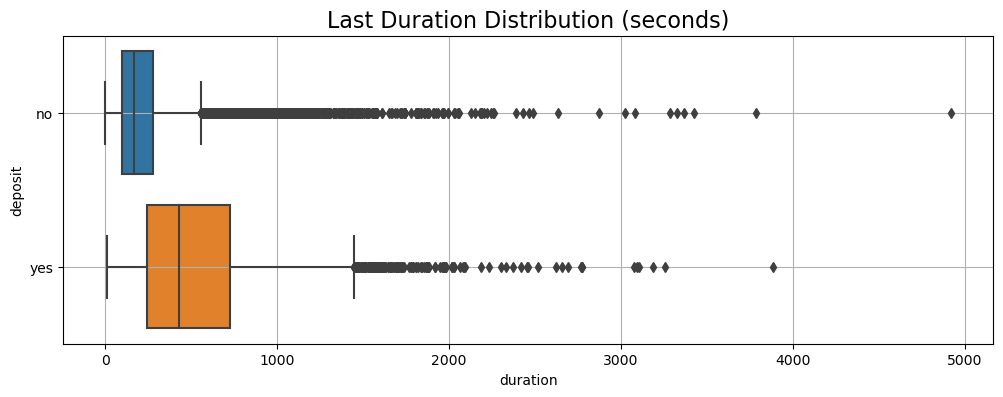

In [53]:
plt.figure(figsize=(12,4))
plt.title('Last Duration Distribution (seconds)',size=16)
plt.xlabel('Duration',size=10)
plt.ylabel('Deposit',size=10)
sns.boxplot(x = df['duration'], y = df['deposit'])
plt.grid(True)
plt.show()

In [54]:
avg_duration = df['duration'].mean()

def set_duration(x):
    if x > avg_duration:
        type_duration = "Above average duration"
    else:
        type_duration = "Below average duration"
    return type_duration

df['duration_type'] = df['duration'].apply(lambda x: set_duration(x))


In [55]:
print('The average time duration is ',avg_duration)

The average time duration is  258.1630797814691


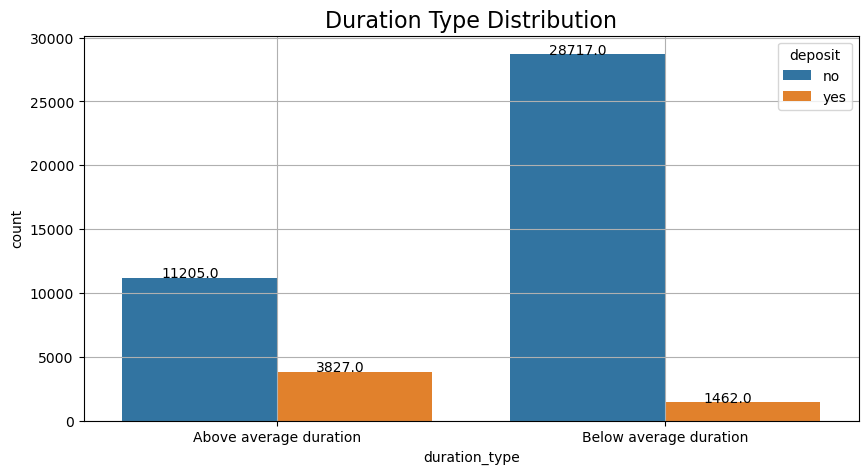

In [56]:
plt.figure(figsize=(10,5))
plt.title('Duration Type Distribution', size=16)
plt.xlabel('Duration Status', size=10)
plt.ylabel('Duration count', size=10)
ax = sns.countplot(x='duration_type', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

1. The customer who has a last contact duration campaign have an high chance to open time deposit account.

2. When the customer had above average contact duration, the customer had more likelihood to open the time deposit accounts in previous campaign.

# **Model Implementation**

### **Logistic Regression Model**

**Logistic regression** is well-suited for binary classification problems where the outcome variable is binary, meaning it has only two possible outcomes. In this case, predicting whether a customer would open time deposit account(yes/no).

In [57]:
#Set target and feature.
X = new_df.drop(columns='deposit')
y = new_df['deposit']


In [58]:
#Show the numerical columns
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

**Standardization**

In the machine learning model is useful when exactly aware of the feature distribution of data or, in other words, a data follows a Gaussian distribution. However, this does not have to be necessarily true. Unlike Normalization, Standardization does not necessarily have a bounding range, so if you have outliers in your data, they will not be affected by Standardization.

In [59]:
#Standardization: Fit the scaler on the training data and transform the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [60]:
from sklearn.model_selection import train_test_split
#Splitting train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Shape train and test
print('The shape of X train: ',X_train.shape)
print('The shape of X test: ',X_test.shape)
print('The shape of y train: ',y_train.shape)
print('The shape of y test: ',y_test.shape)

The shape of X train:  (36168, 16)
The shape of X test:  (9043, 16)
The shape of y train:  (36168,)
The shape of y test:  (9043,)


In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [82]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Logistic Regression: {:.2f}%".format(accuracy))

The accuracy of Logistic Regression: 0.89%


**Summary:**
- Preprocessing with Standardization(Z-score) on numerical columns('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous').
- Splitting the dataset with training 80% and testing 20%.
- Implementing logistic regression classifier for prediction.
- The accuracy of testing data is around 89%.

# **Feature Importance**

Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [64]:
feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact',
'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']

<Axes: ylabel='Feature'>

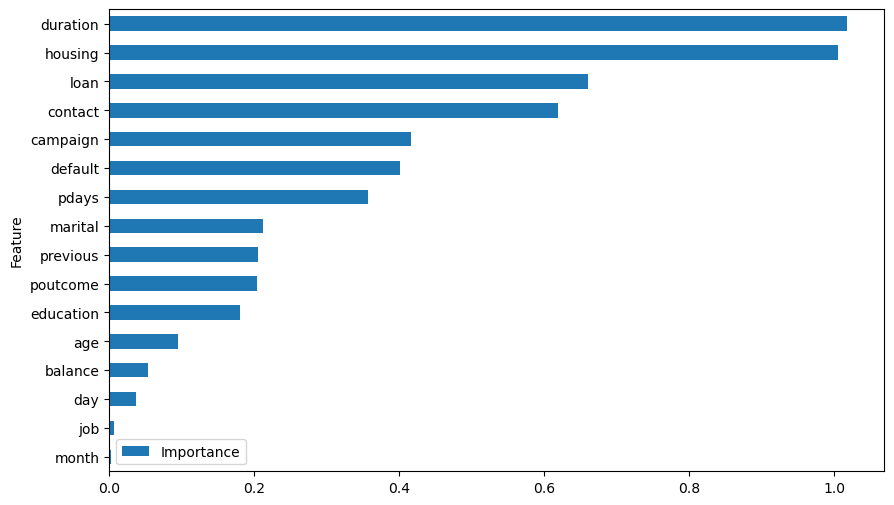

In [66]:
coefficients = logistic.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [67]:
feature_importance.sort_values('Importance', ascending=False)

,Feature,Importance
11,duration,1.017653
6,housing,1.005084
7,loan,0.659738
8,contact,0.618686
12,campaign,0.416406
4,default,0.400869
13,pdays,0.357117
2,marital,0.212809
14,previous,0.205998
15,poutcome,0.204419


In [68]:
#Intercept of Logistic Regression Algorithm
logistic.intercept_

array([-2.64060219])

In [69]:
#Coefficients of Logistic Regression Algorithm
logistic.coef_

array([[ 0.0956466 ,  0.0073652 ,  0.21280867,  0.18024238, -0.40086948,
         0.05349415, -1.00508394, -0.65973823, -0.61868601, -0.03662884,
        -0.00247086,  1.0176534 , -0.41640618,  0.35711663,  0.20599811,
         0.20441868]])

In [85]:
# Extract coefficients and intercept
coefficients = logistic.coef_[0]
intercept = logistic.intercept_[0]

# Get feature names
feature_names = X.columns

# Generate logistic regression equation
equation = f"Log(odds) = {intercept:.4f} "
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f} * {feature})"

# Print the equation

print(equation)


Log(odds) = -2.6406  + (0.10 * age) + (0.01 * job) + (0.21 * marital) + (0.18 * education) + (-0.40 * default) + (0.05 * balance) + (-1.01 * housing) + (-0.66 * loan) + (-0.62 * contact) + (-0.04 * day) + (-0.00 * month) + (1.02 * duration) + (-0.42 * campaign) + (0.36 * pdays) + (0.21 * previous) + (0.20 * poutcome)


**Result:**
* The top importance features:
    * duration
    * housing
    * loan
    * contact
* The intercept of logistic regression equation is -2.64.
* The coefficient are 0.0956466 ,  0.0073652 ,  0.21280867,  0.18024238, -0.40086948,
         0.05349415, -1.00508394, -0.65973823, -0.61868601, -0.03662884,
        -0.00247086,  1.0176534 , -0.41640618,  0.35711663,  0.20599811 and
         0.20441868.
* The equation is ***Log(odds) = -2.6406  + (0.10 * age) + (0.01 * job) + (0.21 * marital) + (0.18 * education) + (-0.40 * default) + (0.05 * balance) + (-1.01 * housing) + (-0.66 * loan) + (-0.62 * contact) + (-0.04 * day) + (-0.00 * month) + (1.02 * duration) + (-0.42 * campaign) + (0.36 * pdays) + (0.21 * previous) + (0.20 * poutcome)***

# **Model Evaluation**

**Confusion Matrix**

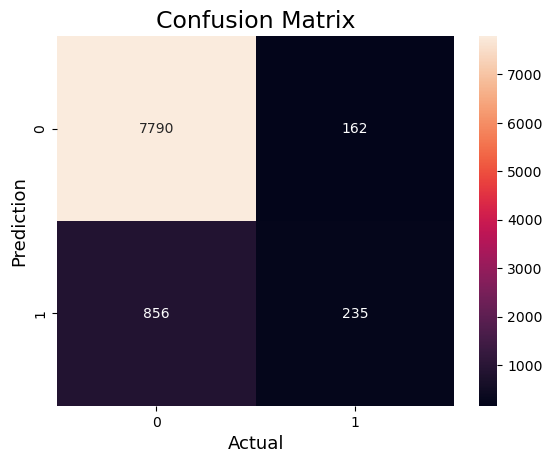

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='g',)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [71]:
print('True negative = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True positive = ', cm[1][1])

True negative =  7790
False positive =  162
False negative =  856
True positive =  235


**Precision and Recall**

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [73]:
print ("---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
print ("AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logistic.predict(X_test)))

---Logistic Model---
AUC = 0.60
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



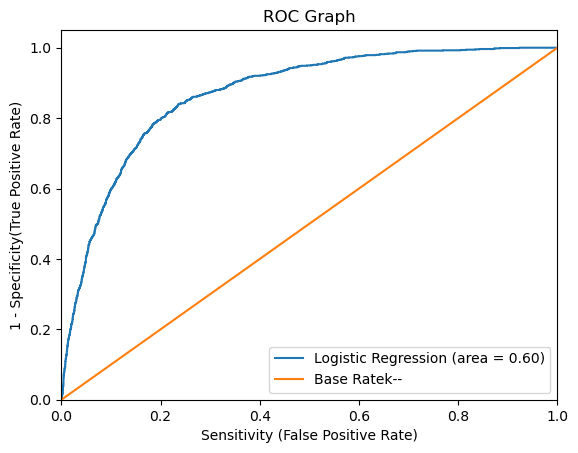

In [74]:
#Print the ROC graph
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.figure()

#Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity (False Positive Rate)')
plt.ylabel('1 - Specificity(True Positive Rate)')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

**Result:**
1. The **precision** and **recall** of class 1 (open time deposit account)  are around 0.59 and 0.22 which could be accepted due to only success rate with 0.11.
2. The **area under curve (AUC)** of logistic regression model is around 0.6.

## **Recommending Feature Action**

* **Age Range Impact:** In the next marketing campaign, the range age around 30 - 53 years had highly chance to open term deposit with 78.91%.


* **Campaign Call Time:** The campaign call should not more than 4 times which can affect to customer decision with open time deposit campaign account. So, the more campaign calling the same customer, they would declined to campaign offering.

* **Occupation Job:** The retired and management is highly likelihood to open time deposit account. Both retired and management who have positive average balance account would be suggest(around 210 - 2,159 euros). Because when customer have more average balance, they have a high chance to open time deposit account.


* **Personal Loan Status:** The next bank marketing campaign, the customer who not have the loan status was suggested. Due to customer who have personal loans status would having a loan might also signal to the bank that the customer's income is already allocated towards repayment, which could affect their ability to consistently contribute to a time deposit over its term.

* **Marital Status:** Married and Single customers should be targeted. The reason are married or single customer would have a long-term financial with time deposit account and even major  life events such as marriage, starting a family, or retirement.

* **House Loan Status:** The customer who did not have housing loan is target for the next bank marketing campaign. Due to the customer who not have to loan from bank, they have less chance to open term deposit account.

* **Contact Time Duration:** As the statistics show that the customer who had above average contact duration campaign, they had likelihood to open time deposit account. So, focusing to contact duration with around the average duration (258.16 seconds) by communicant might have more question during the calls by providing an interesting question to increase more potential to targeted customers leading to an increase probability to open a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will execute.


* **Trending Month:** For focusing last month contact on April, May, June, July, and August had the highest had a highest open time deposit would be suggested.

* **Contact Type:** In contact type, the cellular mobile type would be suggested for targeting customers.